## Regression

In [5]:
# libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# load data
# os.chdir('sample_data')
california_train = pd.read_csv('/content/sample_data/california_housing_train.csv')
california_test = pd.read_csv('/content/sample_data/california_housing_test.csv')
california_train.shape, california_test.shape

((17000, 9), (3000, 9))

In [7]:
# define X and y
y_train = california_train['median_house_value']
X_train = california_train.iloc[:, 0:8]
y_test = california_test['median_house_value']
X_test = california_test.iloc[:, 0:8]

In [8]:
# display dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17000, 8), (17000,), (3000, 8), (3000,))

In [9]:
# features (X): normalize | (x - u)/(SD)
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

# target (y): rescale | x / max(x)
y_train = y_train/y_train.max()
y_test = y_test/y_test.max()

In [10]:
# import
import tensorflow as tf

Relu is a type of activation function, and it takes the following form
$$\text{ReLU}(x) = \max(x, 0)$$
It means that we compare $x$ with 0. If it's positive, we let it go. If it's negative, we replace it with 0. We recall linear regression model can give us negative values, but this data we predict housing price and it cannot be negative.

1-layer model (think of it as linear regression model):

$$
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
→_{w_1, w_2, w_3}
\rightarrow
y
$$


multi-layer model (call it a neural network):

$$
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}
→_{\{w_{1,1}, w_{2,1}, w_{3,1}\}, \{w_{1,2}, w_{2,2}, w_{3,2}\}, \vec{w}_{.,3}}
\rightarrow
\begin{bmatrix}
a_1 \\
a_2 \\
a_3 \\
\end{bmatrix}_{\text{hidden layer 1}}
\rightarrow
y
$$

Model 1:

In [11]:
# # build model
# linear_model = tf.keras.models.Sequential()

# # 1st layer
# linear_model.add(tf.keras.layers.Dense(1, input_shape=[8]))

Model 2:

In [12]:
# build model
linear_model = tf.keras.models.Sequential()

# 1st layer
linear_model.add(tf.keras.layers.Dense(128, input_shape=[8]))

# hidden layer
linear_model.add(tf.keras.layers.Dense(64, activation="relu"))

# finish with output layer
linear_model.add(tf.keras.layers.Dense(1))

It is an optimization problem.
- First, define $\mathcal{L}(y, \hat{y})$
- Second, compute $\nabla \mathcal{L}(y, \hat{y})$
- Do your for loop which is gradient descent: at each step $s$, update the weight according to the following
$$w_s := w_{s-1} - \eta \cdot \nabla \mathcal{L}(y, \hat{y})$$
continue the above until either two things happen: (a) until $s$ hits maximum threshold, (b) until it converges (accuracy/loss flattens out).

In [13]:
# compile
# mse: mean square eror
# sgd: stochastic gradient descent
linear_model.compile(loss='mse', optimizer='sgd')

Recall machine learning template: define `model`, and then train by using `model.fit`.

We learn a function/map called $f(\cdot)$ such that $f(X)$ can produce $y$ with as little error as it can.

In [14]:
# fit
whatever_you_trained = linear_model.fit(
    x=X_train, # features
    y=y_train, # target
    validation_split=0.2, # this is a fraction that takes 20% of the data randomly and perform on
    epochs=10
)

Epoch 1/10
425/425 [==============================] - 2s 2ms/step - loss: 0.0260 - val_loss: 0.0229
Epoch 2/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0167 - val_loss: 0.0209
Epoch 3/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0156 - val_loss: 0.0215
Epoch 4/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0152 - val_loss: 0.0207
Epoch 5/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0148 - val_loss: 0.0200
Epoch 6/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0145 - val_loss: 0.0214
Epoch 7/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0143 - val_loss: 0.0202
Epoch 8/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0142 - val_loss: 0.0194
Epoch 9/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0140 - val_loss: 0.0200
Epoch 10/10
425/425 [==============================] - 1s 2ms/step - loss: 0.0139 - val_loss: 0.0191

In [15]:
# some_dictionary = {'a': 'apple', 'b': [1,2,3,4,5]}
# some_dictionary

In [16]:
# plt.plot(some_dictionary['b'])

In [17]:
# whatever_you_trained.history

In [18]:
# # plot
# plt.figure(figsize=(6, 3))
# plt.plot(history.history['loss'])
# plt.ylim([0, 0.11])
# plt.plot(history.history['val_loss'])
# plt.title('path for loss (train and val) | 2 hidden layers')
# plt.legend(['train', 'validating'])
# plt.show()

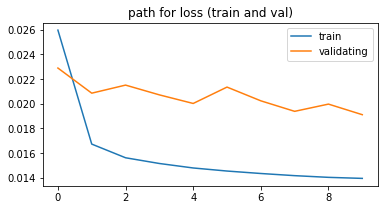

In [19]:
# plot
plt.figure(figsize=(6, 3))
plt.plot(whatever_you_trained.history['loss'])
plt.plot(whatever_you_trained.history['val_loss'])
plt.title('path for loss (train and val)')
plt.legend(['train', 'validating'])
plt.show()

In [20]:
# # plot
# plt.figure(figsize=(8, 3))
# plt.subplot(1, 2, 1) # (number of row, number of column, which plot)
# plt.plot(history.history['loss'])
# plt.title('train')
# plt.subplot(1, 2, 2)
# plt.plot(history.history['val_loss'])
# plt.title('val')
# plt.show()

Evaluation 1:

In [21]:
# evaluation: this gives you whatever you defined in model.compile
linear_model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.0156


0.015637053176760674

Evaluation 2:

In [22]:
# library: mae
from sklearn.metrics import mean_absolute_error

Mean absolute error is
$$\text{MAE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|$$

In [23]:
# use predictions
prediction_on_test = linear_model.predict(X_test)
mean_absolute_error(y_true=y_test, y_pred=prediction_on_test)

0.08890162154533694

In [24]:
# draft
# np.mean(np.abs(prediction_on_test.reshape(-1) - y_test))

Conclusion

| Model | Score | MAE |
|  ---  |  ---  | --- |
| Linear Model | 0.02 | 0.10 |
| 2-layer Model | 0.016 | 0.091 |

## Classification

In [25]:
# use tf API to load the data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [26]:
# display dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [27]:
X_train[0].shape

(28, 28)

In [28]:
np.unique(y_train), len(np.unique(y_train))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), 10)

In [29]:
X_train.max(), X_train.min()

(255, 0)

In [30]:
(X_train/X_train.max()).min(), (X_train/X_train.max()).max()

(0.0, 1.0)

In [31]:
# rescale: X/max(X)
X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [32]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

One hot encode:

$$
\begin{bmatrix}
5 \\
0 \\
4 \\
\end{bmatrix}
\rightarrow_\text{one-hot}
\begin{bmatrix}
'5' & '0' & '4' \\
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1\\
\end{bmatrix}
$$

In [33]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)
y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

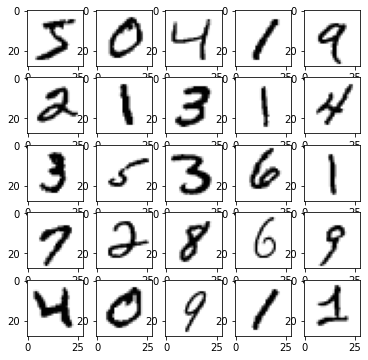

In [34]:
# plot
# args: (1) 2D array, (2) 3D array (but the last dim has to be 3)
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='binary')

plt.show()

Softmax function is a type of activation function that is for classification task. The function is defined as
$$\text{Softmax}(z_{k^*}) = \frac{\exp(-z_{k^*})}{\sum_k \exp(-z_k)}$$

Suppose our neural network model produces 3 classes in the end of the model architecture. Hence, we have 3 numbers (that belonged to real set, i.e. $\mathbb{R}$).

$$
\begin{bmatrix}
4 \\
10 \\
-5 \\
\end{bmatrix}
\rightarrow
\text{softmax}(
\begin{bmatrix}
4 \\
10 \\
-5 \\
\end{bmatrix}
) = 
\begin{pmatrix}
\frac{a}{a+b+c} \\
\frac{b}{a+b+c} \\
\frac{c}{a+b+c} \\
\end{pmatrix}
=
\begin{pmatrix}
\frac{54}{22081.07} \\
\frac{22026}{22081.07} \\
\frac{0.0067}{22081.07} \\
\end{pmatrix}
= (2.47262240e-03, 9.97527072e-01, 3.05145846e-07) = (0.25\%, 99.75\%, 0.000\%) 
$$

This is the 2nd class! Because the probability towards the second class if the highest!

In [45]:
np.exp(4), np.exp(10), np.exp(-5), np.sum([np.exp(4), np.exp(10), np.exp(-5)])

(54.598150033144236,
 22026.465794806718,
 0.006737946999085467,
 22081.07068278686)

In [46]:
[np.exp(4), np.exp(10), np.exp(-5)]/ np.sum([np.exp(4), np.exp(10), np.exp(-5)])

array([2.47262240e-03, 9.97527072e-01, 3.05145846e-07])

In [43]:
2.7**2

7.290000000000001

Model 1

In [35]:
# build model
model = tf.keras.models.Sequential()

# flatten
model.add(tf.keras.layers.Flatten())

# output
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Model 2

In [36]:
# build model
model = tf.keras.models.Sequential()

# flatten
model.add(tf.keras.layers.Flatten())

# hidden
# things to change:
# width of each layer: (units/neurons) you can change the number of units!!!
# depth of the network: you can have any number of Dense layers you like!!!
# summarize: [128, 64, 32]
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))

# output
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [37]:
# compile
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

There are 10 classes.

In [38]:
# fit
history = model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0900 - accuracy: 0.1044 - val_loss: 0.0888 - val_accuracy: 0.1663
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.2147 - val_loss: 0.0858 - val_accuracy: 0.2722
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0838 - accuracy: 0.3176 - val_loss: 0.0814 - val_accuracy: 0.3920
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0791 - accuracy: 0.4348 - val_loss: 0.0763 - val_accuracy: 0.5029
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0731 - accuracy: 0.5616 - val_loss: 0.0686 - val_accuracy: 0.6400
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0636 - accuracy: 0.6769 - val_loss: 0.0567 - val_accuracy: 0.7241
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0514 - accuracy: 0.7340 - val_loss: 0.0447 - val_accuracy:

In [39]:
# evaluation
model.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0117 - accuracy: 0.9271


[0.011703594587743282, 0.9271000027656555]

Conclusion

| Use Hidden | Model | Epochs |Loss | Accuracy |
| --- |  ---  |  ---   | ---  | --- |
| No  | Logistic Model (no one hot) | 10 | 27 | 0.10 |
| No | Logistic Model (10-class) | 10 | 0.0324 | 0.837 |
| Yes | [128, 64, 32] | 10 | 0.028 | 0.85 |
| Yes | [128, 64, 32] | 100 | 0.01 | 0.93 |
| Yes| [1024, 64, 32] | 10 | 0.020    | 0.885    |

## In Production

In [93]:
# install my own library
!pip install git+https://github.com/yiqiao-yin/RandomModel.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/yiqiao-yin/RandomModel.git to /tmp/pip-req-build-p1se_654
  Running command git clone -q https://github.com/yiqiao-yin/RandomModel.git /tmp/pip-req-build-p1se_654
  Created wheel for RandomModel: filename=RandomModel-0.0.0-py3-none-any.whl size=2858 sha256=ba23e37ca4b5bf5089f4923082421850676071419a79727290e2538d48f0509b
  Stored in directory: /tmp/pip-ephem-wheel-cache-u9jfhup2/wheels/a0/a9/cb/70ecf1b1e983c6526d6785d3f9a2c2c0d733898bea98483c3a
Successfully built RandomModel


In [102]:
import deeplearning.modules

In [104]:
test_run_result_1 = simple_neuralnetwork_model(
    x=X_train, 
    y=y_train_onehot,
    hidden = [256, 128, 64, 32, 16],
    output_dim = 10,
    validation_split=0.1,
    loss='mse',
    optimizer='sgd',
    epochs=10,
    verbose=True
)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0898 - accuracy: 0.0840 - val_loss: 0.0896 - val_accuracy: 0.0923
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0894 - accuracy: 0.1140 - val_loss: 0.0891 - val_accuracy: 0.1322
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0888 - accuracy: 0.1661 - val_loss: 0.0884 - val_accuracy: 0.1738
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0878 - accuracy: 0.1989 - val_loss: 0.0870 - val_accuracy: 0.2030
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0860 - accuracy: 0.2313 - val_loss: 0.0845 - val_accuracy: 0.2503
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0832 - accuracy: 0.2842 - val_loss: 0.0815 - val_accuracy: 0.3197
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0803 - accuracy: 0.3401 - val_loss: 0.0785 - val_accuracy:

In [105]:
type(test_run_result_1)

dict

In [106]:
test_run_result_1.keys()

dict_keys(['model', 'history'])

In [107]:
test_run_result_1['model'].evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0619 - accuracy: 0.5671


[0.06191315874457359, 0.5670999884605408]

In [131]:
some_results_portfolio = [] # empty placeholder
for some_tuning_level in [[128, 64, 32], [1024, 64, 32], [128, 128, 32]]:
    test_run_result_1 = simple_neuralnetwork_model(
        x=X_train, 
        y=y_train_onehot,
        hidden = some_tuning_level,
        output_dim = 10,
        validation_split=0.1,
        loss='mse',
        optimizer='sgd',
        epochs=10,
        verbose=False
    )

    some_results_portfolio.append(test_run_result_1)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0893 - accuracy: 0.1359 - val_loss: 0.0877 - val_accuracy: 0.2283
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.2951 - val_loss: 0.0837 - val_accuracy: 0.3728
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0810 - accuracy: 0.4183 - val_loss: 0.0770 - val_accuracy: 0.4997
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0738 - accuracy: 0.5205 - val_loss: 0.0679 - val_accuracy: 0.5978
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0634 - accuracy: 0.6186 - val_loss: 0.0546 - val_accuracy: 0.6993
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0509 - accuracy: 0.6916 - val_loss: 0.0426 - val_accuracy: 0.7413
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0418 - accuracy: 0.7329 - val_loss: 0.0338 - val_accuracy:

In [108]:
some_results_portfolio = [] # empty placeholder
for some_tuning_level in [128, 256, 512, 1024]:
    test_run_result_1 = simple_neuralnetwork_model(
        x=X_train, 
        y=y_train_onehot,
        hidden = [some_tuning_level, 64, 32, 16],
        output_dim = 10,
        validation_split=0.1,
        loss='mse',
        optimizer='sgd',
        epochs=10,
        verbose=False
    )

    some_results_portfolio.append(test_run_result_1)

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0899 - accuracy: 0.0652 - val_loss: 0.0895 - val_accuracy: 0.0890
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0893 - accuracy: 0.1219 - val_loss: 0.0889 - val_accuracy: 0.1655
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0886 - accuracy: 0.1915 - val_loss: 0.0881 - val_accuracy: 0.2442
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.2652 - val_loss: 0.0869 - val_accuracy: 0.3192
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0863 - accuracy: 0.3306 - val_loss: 0.0850 - val_accuracy: 0.3673
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0836 - accuracy: 0.3635 - val_loss: 0.0813 - val_accuracy: 0.3848
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0792 - accuracy: 0.4046 - val_loss: 0.0760 - val_accuracy:

Let's take a look at the output

In [112]:
some_results_portfolio[0]['model'].evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0542 - accuracy: 0.6227


[0.05424582585692406, 0.6226999759674072]

In [113]:
some_results_portfolio[1]['model'].evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 4ms/step - loss: 0.0451 - accuracy: 0.6913


[0.04508918523788452, 0.6912999749183655]

In [114]:
some_results_portfolio[2]['model'].evaluate(X_test, y_test_onehot)

313/313 [==============================] - 2s 7ms/step - loss: 0.0323 - accuracy: 0.8055


[0.03233109042048454, 0.8054999709129333]

In [117]:
final_results_together = [some_results_portfolio[i]['model'].evaluate(X_test, y_test_onehot) for i in range(4)]

313/313 [==============================] - 2s 8ms/step - loss: 0.0328 - accuracy: 0.7863


In [121]:
# define the final final result
final_final_result = pd.DataFrame(final_results_together)

In [125]:
# specify columns
final_final_result.columns = ['loss', 'accuracy']

In [128]:
final_final_result.index = ['128', '256', '512', '1024']

In [130]:
final_final_result.to_csv('some_result.csv')

In [132]:
import random

In [133]:
from scipy.stats import binom

In [153]:
n = 500
p = .9

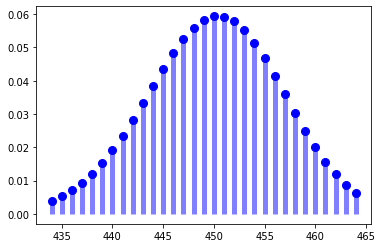

In [154]:
fig, ax = plt.subplots(1, 1)

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)